<a href="https://colab.research.google.com/github/Viliuskerutis/AML/blob/main/AML_MP1_Kerutis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MP1 - Viral Data Analysis
Date: 2020.10.11

Author: © 2020 Vilius Kerutis

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/) [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here I analyze open COVID-19 data from https://ourworldindata.org/ to answer the following questions:

1. [Which country has the most deaths per million people in June?](#Q1)
1. [What is the correlation between human development and total deaths among countries?](#Q2)
1. [What is the future prognosis of total deaths per million people, taking a history of total cases as input in Haiti?](#Q3)

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

## Load the data

In [33]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import numpy.ma as ma
import matplotlib.pyplot as plt
import seaborn as sns

<a id='Q1'></a>
# 1. Which country has the most deaths per million people in June?

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/Viliuskerutis/AML/main/owid-covid-data.csv', low_memory=False)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

Check the "freshness" of the data.

In [42]:
df.date.max()

'2020-10-23'

All the different country codes:

In [43]:
df.iso_code.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR',
       'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI',

Column info.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52010 entries, 0 to 52009
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         51712 non-null  object 
 1   continent                        51414 non-null  object 
 2   location                         52010 non-null  object 
 3   date                             52010 non-null  object 
 4   total_cases                      48403 non-null  float64
 5   new_cases                        51127 non-null  float64
 6   new_cases_smoothed               50339 non-null  float64
 7   total_deaths                     39558 non-null  float64
 8   new_deaths                       51127 non-null  float64
 9   new_deaths_smoothed              50339 non-null  float64
 10  total_cases_per_million          48141 non-null  float64
 11  new_cases_per_million            51063 non-null  float64
 12  new_cases_smoothed

In [45]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.840300e+04,51127.000000,50339.000000,3.955800e+04,51127.000000,50339.000000,48141.000000,51063.000000,50274.000000,39311.000000,51063.000000,50274.000000,1.974700e+04,1.940500e+04,19747.000000,19405.000000,2.179200e+04,21792.000000,20099.000000,20443.000000,43401.000000,5.171200e+04,49319.000000,46327.000000,45633.000000,46086.000000,45715.000000,30486.000000,46307.000000,47979.000000,36133.000000,35670.000000,21826.000000,41762.000000,51052.000000,44695.000000
mean,1.363255e+05,1633.995130,1610.990888,6.138200e+03,44.546169,44.541465,2509.232423,30.042849,29.171387,85.372714,0.591967,0.588009,1.905907e+06,2.581705e+04,66.336827,0.826141,2.488937e+04,0.805787,192.383357,0.064548,56.947631,8.695300e+07,361.309540,31.252106,9.215518,5.825576,20759.873465,12.286751,252.008369,8.055200,10.772976,32.639174,52.273566,3.098288,73.977683,0.723461
std,1.365615e+06,14742.358503,14422.555759,4.970171e+04,371.661458,360.945190,4961.512720,106.407273,72.906009,169.636207,2.937695,1.865053,8.657876e+06,1.051654e+05,132.322326,1.534724,9.695588e+04,1.387750,915.093742,0.087988,26.684086,6.070910e+08,1648.604689,9.036782,6.307452,4.304546,20372.636885,19.332899,117.420490,4.155891,10.475901,13.440016,31.625685,2.520225,7.387655,0.153074
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.440000e+02,0.000000,0.714000,1.100000e+01,0.000000,0.000000,72.480000,0.000000,0.202000,3.378500,0.000000,0.000000,5.366700e+04,1.008000e+03,3.338000,0.068000,1.091000e+03,0.069000,11.479500,0.009000,38.890000,1.399491e+06,37.728000,23.300000,3.552000,2.085000,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.724000e+03,12.000000,17.286000,7.200000e+01,0.000000,0.286000,479.937000,1.863000,3.431000,17.557000,0.000000,0.025000,2.299580e+05,3.486000e+03,17.078000,0.311000,3.874500e+03,0.325000,32.519000,0.030000,61.110000,8.278737e+06,88.125000,31.100000,6.981000,4.393000,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.705000e+04,194.000000,202.500000,6.140000e+02,3.000000,3.429000,2794.176000,21.600500,24.295000,71.529000,0.243000,0.345000,9.141365e+05,1.281300e+04,72.630000,0.970000,1.371450e+04,0.975000,105.000000,0.086000,78.700000,2.982597e+07,214.243000,39.700000,14.762000,9.395000,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.177193e+07,437012.000000,390097.429000,1.138780e+06,10491.000000,7456.857000,49323.756000,8652.658000,2472.188000,1237.551000,215.382000,63.140000,1.600000e+08,1.492409e+06,1553.505000,25.971000,1.169107e+06,19.098000,45864.000000,0.651000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


Find a country with the most total deaths per million people in June.

In [46]:
date_from = pd.Timestamp(date(2020,6,1))
date_to = pd.Timestamp(date(2020,7,1))
df['date'] =  pd.to_datetime(df['date'])
dff = df[(df['date'] > date_from ) & (df['date'] < date_to)]
dff = dff.loc[dff['total_deaths_per_million'].idxmax()]

pd.DataFrame(dff[['iso_code', 'continent', 'location','total_cases','total_deaths','total_cases_per_million','total_deaths_per_million','population']])

,42289
iso_code,SMR
continent,Europe
location,San Marino
total_cases,687
total_deaths,42
total_cases_per_million,20242.8
total_deaths_per_million,1237.55
population,33938


<a id='Q2'></a>
# 2. What is the correlation between human development and total deaths among countries?

In [55]:
yesterday = date.today() - timedelta(1)
dfff = df[(df['date'] == date.strftime(yesterday, '%Y-%m-%d 00:00:00'))]

Text(0.5, 1.0, 'Correlation HDI and Total deaths')

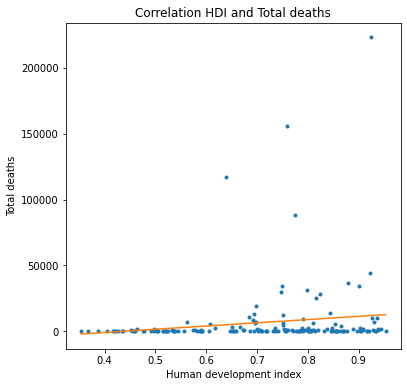

In [54]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths
plt.plot(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths')

w1, w0 = ma.polyfit(ma.masked_invalid(x), ma.masked_invalid(y), 1)
x_all = np.linspace(x.min(), x.max(), 100)
plt.plot(x_all, w0 + w1 * x_all, '-')

plt.title('Correlation HDI and Total deaths')

In [57]:
ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))[0,1]

0.15609727079402214

Text(0.5, 1.0, 'Correlation HDI and Total deaths per million people')

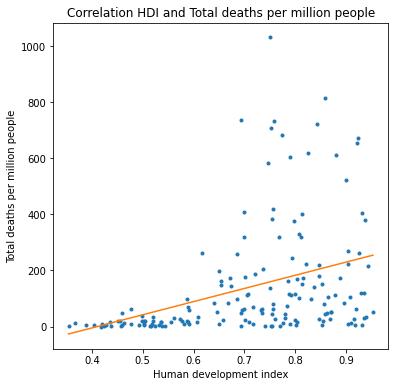

In [58]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths_per_million
plt.plot(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths per million people')

w1, w0 = ma.polyfit(ma.masked_invalid(x), ma.masked_invalid(y), 1)
x_all = np.linspace(x.min(), x.max(), 100)
plt.plot(x_all, w0 + w1 * x_all, '-')

plt.title('Correlation HDI and Total deaths per million people')

In [59]:
ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))[0,1]

0.36798225921535566

Correlation:

In [56]:
result1 = dfff['total_deaths'].corr(dfff['human_development_index'])
result2 = dfff['total_deaths_per_million'].corr(dfff['human_development_index'])
pd.DataFrame({"Correlation using:": ["Total deaths only:", "Total deaths per million people:"], "Result": [result1, result2]})

,Correlation using:,Result
0,Total deaths only:,0.156097
1,Total deaths per million people:,0.367982


In [ ]:
There is a promiment correlation (coef. 0.16) between the HDI per capita and the total number of deaths per capita among countries.
There is a promiment correlation (coef. 0.37) between the HDI per capita and the total number of deaths per million people per capita among countries.

The same in loglog space:

Text(0.5, 1.0, 'Correlation HDI and Total deaths')

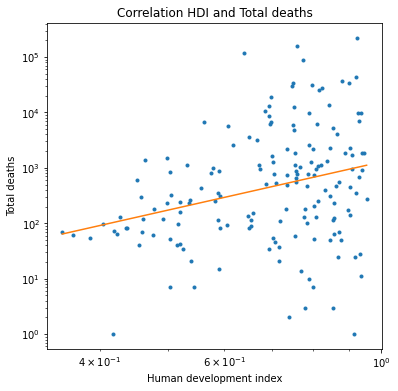

In [69]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths
plt.loglog(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths')


w1, w0 = ma.polyfit(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)), 1)
x_all = np.linspace(np.log(x.min()), np.log(x.max()), 100)
plt.plot(np.exp(x_all), np.exp(w0 + w1 * x_all), '-')
plt.title('Correlation HDI and Total deaths')

In [70]:
ma.corrcoef(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)))[0,1]

0.28965229435325474

Text(0.5, 1.0, 'Correlation HDI and Total deaths per million people')

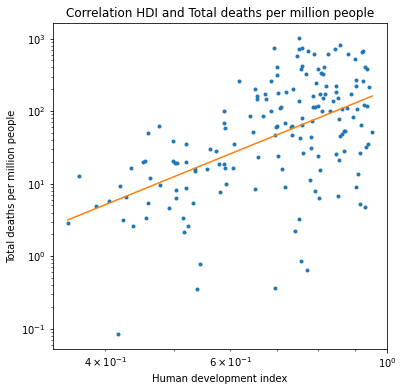

In [71]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths_per_million
plt.loglog(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths per million people')


w1, w0 = ma.polyfit(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)), 1)
x_all = np.linspace(np.log(x.min()), np.log(x.max()), 100)
plt.plot(np.exp(x_all), np.exp(w0 + w1 * x_all), '-')
plt.title('Correlation HDI and Total deaths per million people')

In [72]:
ma.corrcoef(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)))[0,1]

0.5353294475125274

On logarithmic scales the correlation is even more evident:

Correlation between HDI and Total deaths: coef. 0.29

Correlation between HDI and Total deaths per million people: coef. 0.54

A possible explanation could be that even though the countries with higher HDI per capita tend to have a better quality of life, higher literacy rate, and lifetime, their residents also have a more active social life (traveling, physical communication, being in a public most of the time).

<a id='Q3'></a>
# 3. What is the future prognosis of total deaths per million people, taking a history of total cases as input in Haiti?